In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf



In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255)
validation_datagen=ImageDataGenerator(rescale=1./255)
train_directory="train"
validation_directory="validation"

train_generator=train_datagen.flow_from_directory(train_directory,target_size=(150,150),
                                                  batch_size=20,class_mode="binary")
validation_generator=validation_datagen.flow_from_directory(validation_directory,target_size=(150,150),
                                                  batch_size=20,class_mode="binary")


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
from keras.models import Sequential
from keras.layers import Conv2D,Dropout,MaxPool2D,Flatten,Dense
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(150,150,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation="relu",))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [5]:
from tensorflow.keras import optimizers
model.compile(loss="binary_crossentropy",optimizer=optimizers.RMSprop(learning_rate=1e-4),metrics=["accuracy"])

In [6]:
history=model.fit(train_generator,epochs=20,validation_data=validation_generator,validation_steps=50)

Epoch 1/20
100/100 [==============================] - 37s 361ms/step - loss: 0.6897 - accuracy: 0.5315 - val_loss: 0.6765 - val_accuracy: 0.5690
Epoch 2/20
100/100 [==============================] - 37s 365ms/step - loss: 0.6601 - accuracy: 0.5970 - val_loss: 0.6391 - val_accuracy: 0.6140
Epoch 3/20
100/100 [==============================] - 36s 362ms/step - loss: 0.6268 - accuracy: 0.6395 - val_loss: 0.6272 - val_accuracy: 0.6390
Epoch 4/20
100/100 [==============================] - 36s 364ms/step - loss: 0.5969 - accuracy: 0.6705 - val_loss: 0.5970 - val_accuracy: 0.6690
Epoch 5/20
100/100 [==============================] - 37s 365ms/step - loss: 0.5598 - accuracy: 0.7100 - val_loss: 0.5950 - val_accuracy: 0.6830
Epoch 6/20
100/100 [==============================] - 36s 362ms/step - loss: 0.5422 - accuracy: 0.7240 - val_loss: 0.5771 - val_accuracy: 0.7000
Epoch 7/20
100/100 [==============================] - 36s 364ms/step - loss: 0.5073 - accuracy: 0.7470 - val_loss: 0.5716 - val_ac

C:\Users\Ertuğrul\AppData\Local\Temp\ipykernel_15920\625568713.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


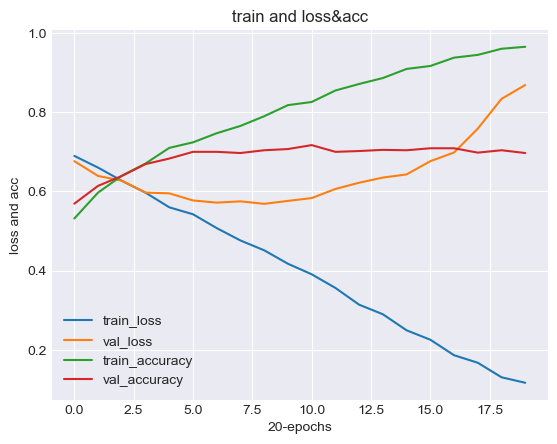

In [7]:
import matplotlib.pyplot as plt
import numpy as np

epochs=20

plt.style.use("seaborn-darkgrid")
plt.figure()

plt.plot(np.arange(0,epochs),history.history["loss"],label="train_loss")
plt.plot(np.arange(0,epochs),history.history["val_loss"],label="val_loss")

plt.plot(np.arange(0,epochs),history.history["accuracy"],label="train_accuracy")
plt.plot(np.arange(0,epochs),history.history["val_accuracy"],label="val_accuracy")

plt.title("train and loss&acc")
plt.xlabel("20-epochs")
plt.ylabel("loss and acc")
plt.legend(loc="lower left")
plt.show()


When we look at the val_loss and val_accuracy values on the chart, we observe overfitting.

In [12]:
model1=Sequential()
model1.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(150,150,3)))
model1.add(MaxPool2D(pool_size=(2,2)))

model1.add(Conv2D(64,kernel_size=(3,3),activation="relu"))
model1.add(MaxPool2D(pool_size=(2,2)))

model1.add(Conv2D(64,kernel_size=(3,3),activation="relu"))
model1.add(MaxPool2D(pool_size=(2,2)))

model1.add(Flatten())
model1.add(Dropout(0.4))
model1.add(Dense(512,activation="relu"))
model1.add(Dense(1,activation="sigmoid"))
model1.summary()

model1.compile(loss="binary_crossentropy",optimizer=optimizers.RMSprop(learning_rate=1e-4),metrics=["accuracy"])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 17, 17, 64)       

In [16]:
train_datagen_n=ImageDataGenerator(rescale=1./255,
                                   rotation_range=45,
                                   width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   shear_range=0.3,
                                   zoom_range=0.3,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode="nearest")
validation_datagen_n=ImageDataGenerator(rescale=1./255)
train_directory="train"
validation_directory="validation"

train_generator_n=train_datagen_n.flow_from_directory(train_directory,target_size=(150,150),
                                                  batch_size=16,class_mode="binary")
validation_generator_n=validation_datagen_n.flow_from_directory(validation_directory,target_size=(150,150),
                                                  batch_size=16,class_mode="binary")

history1=model1.fit(train_generator_n,epochs=60,steps_per_epoch=60,
                    validation_data=validation_generator_n,validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/60
60/60 [==============================] - 21s 353ms/step - loss: 0.6301 - accuracy: 0.6396 - val_loss: 0.5736 - val_accuracy: 0.6988
Epoch 2/60
60/60 [==============================] - 21s 350ms/step - loss: 0.6095 - accuracy: 0.6448 - val_loss: 0.6027 - val_accuracy: 0.6525
Epoch 3/60
60/60 [==============================] - 21s 356ms/step - loss: 0.6171 - accuracy: 0.6479 - val_loss: 0.5751 - val_accuracy: 0.6888
Epoch 4/60
60/60 [==============================] - 21s 348ms/step - loss: 0.6137 - accuracy: 0.6448 - val_loss: 0.5784 - val_accuracy: 0.6913
Epoch 5/60
60/60 [==============================] - 21s 346ms/step - loss: 0.6043 - accuracy: 0.6573 - val_loss: 0.5974 - val_accuracy: 0.6637
Epoch 6/60
60/60 [==============================] - 21s 348ms/step - loss: 0.6265 - accuracy: 0.6417 - val_loss: 0.5783 - val_accuracy: 0.6725
Epoch 7/60
60/60 [==============================] - 21s 34

C:\Users\Ertuğrul\AppData\Local\Temp\ipykernel_15920\4125265865.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


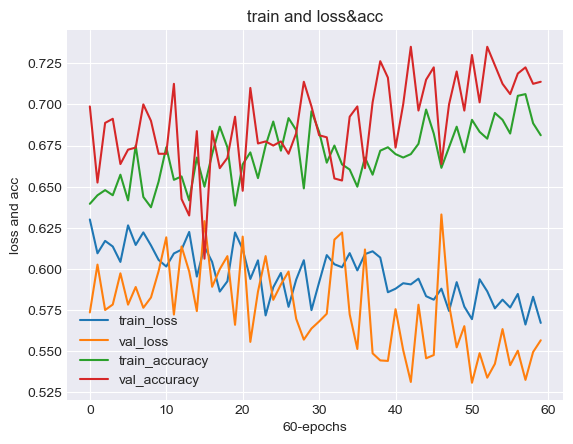

In [17]:
epochs=60

plt.style.use("seaborn-darkgrid")
plt.figure()

plt.plot(np.arange(0,epochs),history1.history["loss"],label="train_loss")
plt.plot(np.arange(0,epochs),history1.history["val_loss"],label="val_loss")

plt.plot(np.arange(0,epochs),history1.history["accuracy"],label="train_accuracy")
plt.plot(np.arange(0,epochs),history1.history["val_accuracy"],label="val_accuracy")

plt.title("train and loss&acc")
plt.xlabel("60-epochs")
plt.ylabel("loss and acc")
plt.legend(loc="lower left")
plt.show()

As can be seen in the figure, it seems that the machine did not overfit this time compared to the previous one. We achieved this by using data increase techniques. Of course, we can increase the accuracy value and decrease the loss value by using different parameters, but the part I examined here was to save the machine from overfitting, we succeeded :)

In [18]:
from keras.preprocessing.image import load_img,img_to_array
from keras.models import load_model


In [19]:
model.save("model.h5")


C:\Users\Ertuğrul\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


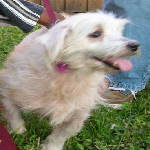

In [20]:
model_path="model.h5"
image_path="test/dog/dog.9.jpg"
predict_model=load_model(model_path)
test_img=load_img(image_path,target_size=(150,150))
test_img

In [21]:
test_img=img_to_array(test_img)
test_img.shape


(150, 150, 3)

In [22]:
test_img=np.expand_dims(test_img,axis=0)
test_img.shape

(1, 150, 150, 3)

In [23]:
train_generator_n.class_indices

{'cat': 0, 'dog': 1}

In [24]:
result=predict_model.predict(test_img)

1/1 [==============================] - 0s 177ms/step


In [25]:
if result[0][0]>0.5:
    print("Dog")
    label="dog"
else:
    print("Cat")
    label="cat"

Dog
